In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("data/frequency.csv")
data.head(5)
arr1 = data[['vleft [A/m2]', 'freql']].to_numpy()
arr2 = data[['vleft [A/m2]', 'freqr']].to_numpy()

(999, 2)

### Frequency Distribution of Currant Density for Thickness = 85.1 $\mu m$ and $\frac{A}{A_0} = 0.3638$

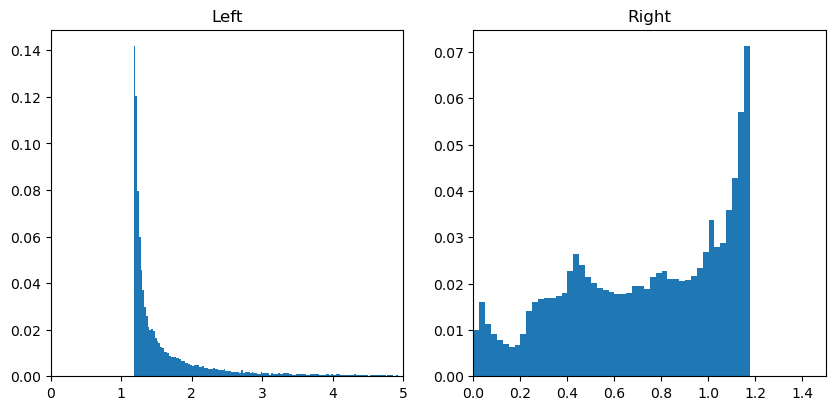

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4.5))
ax[0].hist(arr1[:-1, 0], arr1[:, 0], weights=arr1[:-1, 1]);
ax[0].set_xlim([0, 5]);
ax[0].set_title('Left')
ax[1].hist(arr2[:-1, 0], arr2[:, 0], weights=arr2[:-1, 1]);
ax[1].set_xlim([0, 1.5]);
ax[1].set_title('Right')
plt.show()